In [ ]:
# Importujemy biblioteki do analizy danych i uczenia maszynowego
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Praca z danymi

In [ ]:
# Wczytanie zbioru danych
data = pd.read_csv('https://raw.githubusercontent.com/Francho03/AI-Project/refs/heads/main/data/data.csv')
data.sample(5)

,lp,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
38462,19287,68649,Female,Loyal Customer,60,Business travel,Eco,175,3,2,...,3,3,3,3,1,3,2,0,0.0,neutral or dissatisfied
61274,35485,122433,Male,disloyal Customer,22,Business travel,Eco,416,5,0,...,1,1,2,2,2,4,1,0,0.0,satisfied
1087,544,124273,Female,disloyal Customer,24,Business travel,Business,255,5,0,...,3,5,3,4,4,5,3,0,0.0,satisfied
101725,76056,106001,Male,Loyal Customer,39,Business travel,Eco,1999,3,4,...,3,4,4,3,1,3,3,13,8.0,neutral or dissatisfied
28751,14414,125306,Male,Loyal Customer,51,Personal Travel,Eco,678,2,4,...,5,4,2,5,3,4,5,0,0.0,neutral or dissatisfied


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   lp                                 129487 non-null  int64  
 1   id                                 129487 non-null  int64  
 2   Gender                             129487 non-null  object 
 3   Customer Type                      129487 non-null  object 
 4   Age                                129487 non-null  int64  
 5   Type of Travel                     129487 non-null  object 
 6   Class                              129487 non-null  object 
 7   Flight Distance                    129487 non-null  int64  
 8   Inflight wifi service              129487 non-null  int64  
 9   Departure/Arrival time convenient  129487 non-null  int64  
 10  Ease of Online booking             129487 non-null  int64  
 11  Gate location                      1294

In [ ]:
# Sprawdzenie brakujących wartości
pd.isnull(data).sum()

,0
lp,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [ ]:
# # Kodowanie zmiennych kategorycznych na wartości liczbowe
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Customer Type'] = le.fit_transform(data['Customer Type'])
data['Type of Travel'] = le.fit_transform(data['Type of Travel'])
data['Class'] = le.fit_transform(data['Class'])
data['satisfaction'] = le.fit_transform(data['satisfaction'])

In [ ]:
data.sample(5)

,lp,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
29028,14553,7873,1,0,40,0,0,2874,1,1,...,4,4,4,4,4,4,5,8,13.0,1
4287,2149,14586,0,1,25,0,1,986,2,2,...,2,2,4,3,1,4,2,4,10.0,0
76044,50307,118880,1,0,27,1,1,1136,2,5,...,2,4,5,4,5,5,2,1,0.0,0
115202,89580,68387,0,0,54,0,0,1045,5,5,...,5,5,5,5,5,5,5,0,0.0,1
57994,32184,82946,1,0,50,0,0,2577,1,1,...,5,5,5,5,3,5,3,0,0.0,1


# Statystyki opisowe

In [ ]:
# Tworzymy podstawowe statystyki opisowe, dodajemy modę (dominantę) oraz wariancję
summary = data.describe()
summary.loc['mode'] = data.mode().iloc[0]
summary.loc['variance'] = data.var()
display(summary)

,lp,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,1.294870e+05,1.294870e+05,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,4.415897e+04,6.495834e+04,0.492590,0.183138,39.428761,0.309236,0.593704,1190.210662,2.728544,3.057349,...,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129,0.434499
std,3.120953e+04,3.748978e+04,0.499947,0.386781,15.117597,0.462180,0.621371,997.560954,1.329235,1.526787,...,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650,0.495693
min,0.000000e+00,1.000000e+00,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.623000e+04,3.249450e+04,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,3.896600e+04,6.497200e+04,0.000000,0.000000,40.000000,0.000000,1.000000,844.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,7.144050e+04,9.741550e+04,1.000000,0.000000,51.000000,1.000000,1.000000,1744.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.039030e+05,1.298800e+05,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000
mode,0.000000e+00,1.000000e+00,0.000000,0.000000,39.000000,0.000000,0.000000,337.000000,2.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000
variance,9.740345e+08,1.405484e+09,0.249947,0.149600,228.541731,0.213611,0.386102,995127.857371,1.766865,2.331079,...,1.779955,1.656452,1.732203,1.392594,1.603126,1.384420,1.725608,1438.902365,1479.606248,0.245712


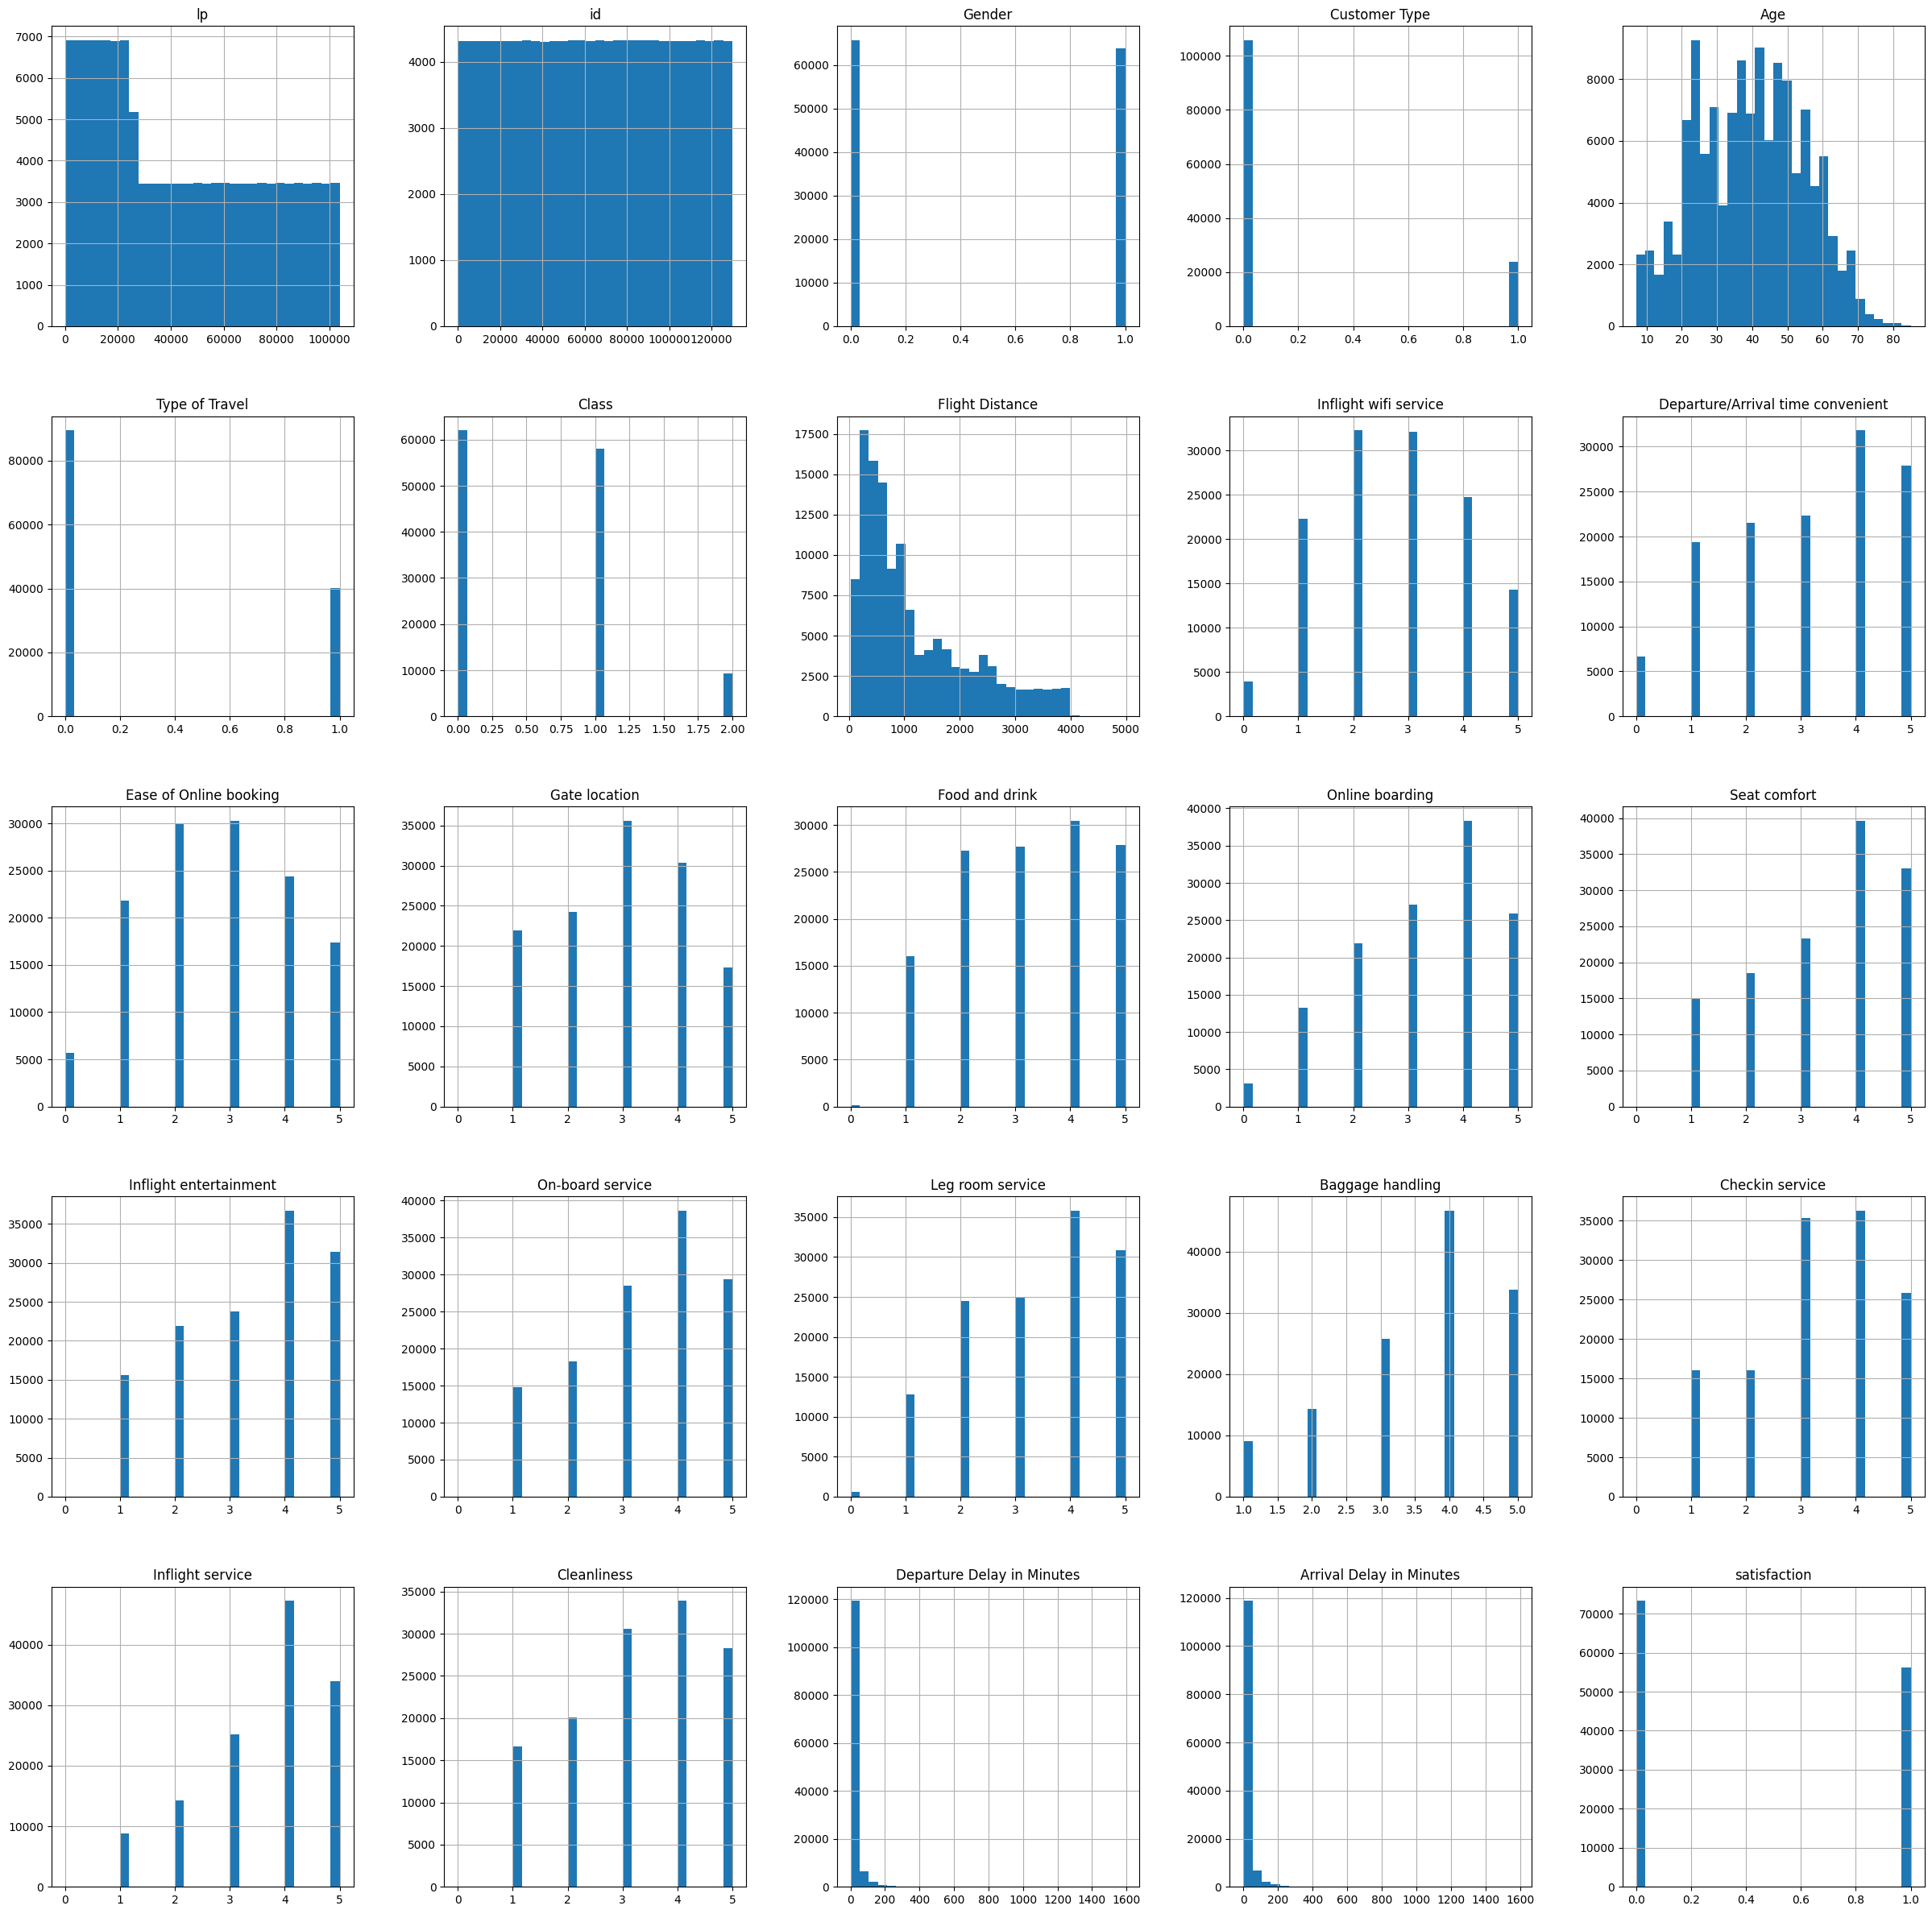

In [ ]:
# Prezentujemy histogramy
data.hist(figsize = (30, 30))
plt.show()

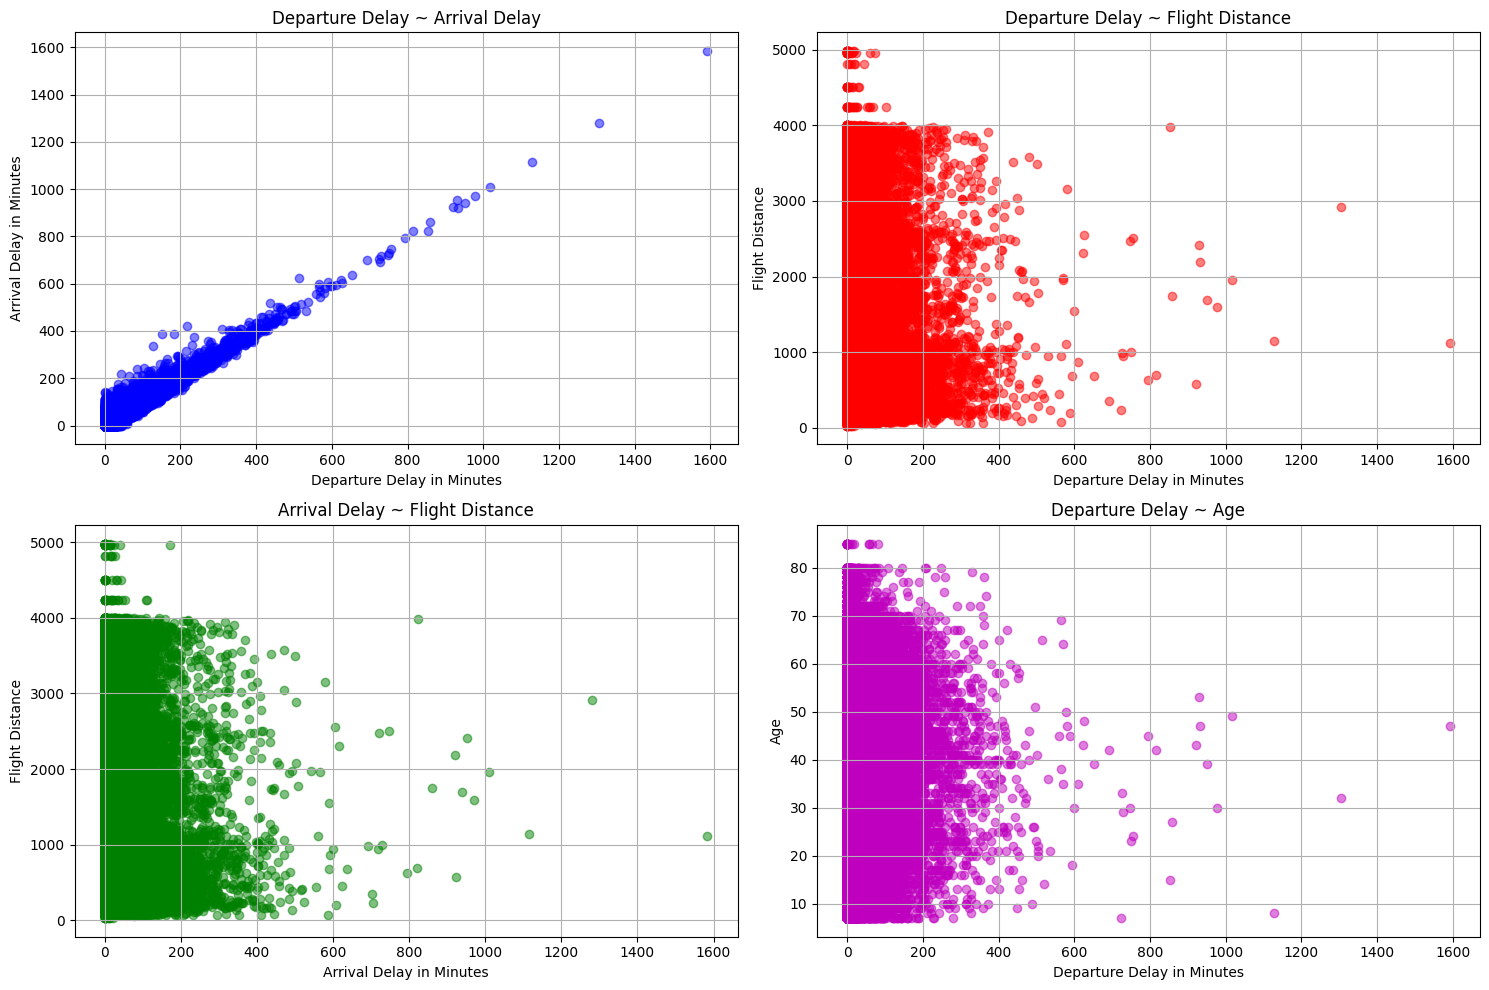

In [ ]:
# Tworzymy wykresy rozrzutu dla zależności między poszczególnymi zmiennymi
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].scatter(data['Departure Delay in Minutes'], data['Arrival Delay in Minutes'], alpha=0.5, color='b')
axes[0, 0].set_xlabel('Departure Delay in Minutes')
axes[0, 0].set_ylabel('Arrival Delay in Minutes')
axes[0, 0].set_title('Departure Delay ~ Arrival Delay')
axes[0, 0].grid(True)

axes[0, 1].scatter(data['Departure Delay in Minutes'], data['Flight Distance'], alpha=0.5, color='r')
axes[0, 1].set_xlabel('Departure Delay in Minutes')
axes[0, 1].set_ylabel('Flight Distance')
axes[0, 1].set_title('Departure Delay ~ Flight Distance')
axes[0, 1].grid(True)

axes[1, 0].scatter(data['Arrival Delay in Minutes'], data['Flight Distance'], alpha=0.5, color='g')
axes[1, 0].set_xlabel('Arrival Delay in Minutes')
axes[1, 0].set_ylabel('Flight Distance')
axes[1, 0].set_title('Arrival Delay ~ Flight Distance')
axes[1, 0].grid(True)

axes[1, 1].scatter(data['Departure Delay in Minutes'], data['Age'], alpha=0.5, color='m')
axes[1, 1].set_xlabel('Departure Delay in Minutes')
axes[1, 1].set_ylabel('Age')
axes[1, 1].set_title('Departure Delay ~ Age')
axes[1, 1].grid(True)

plt.tight_layout()

plt.show()

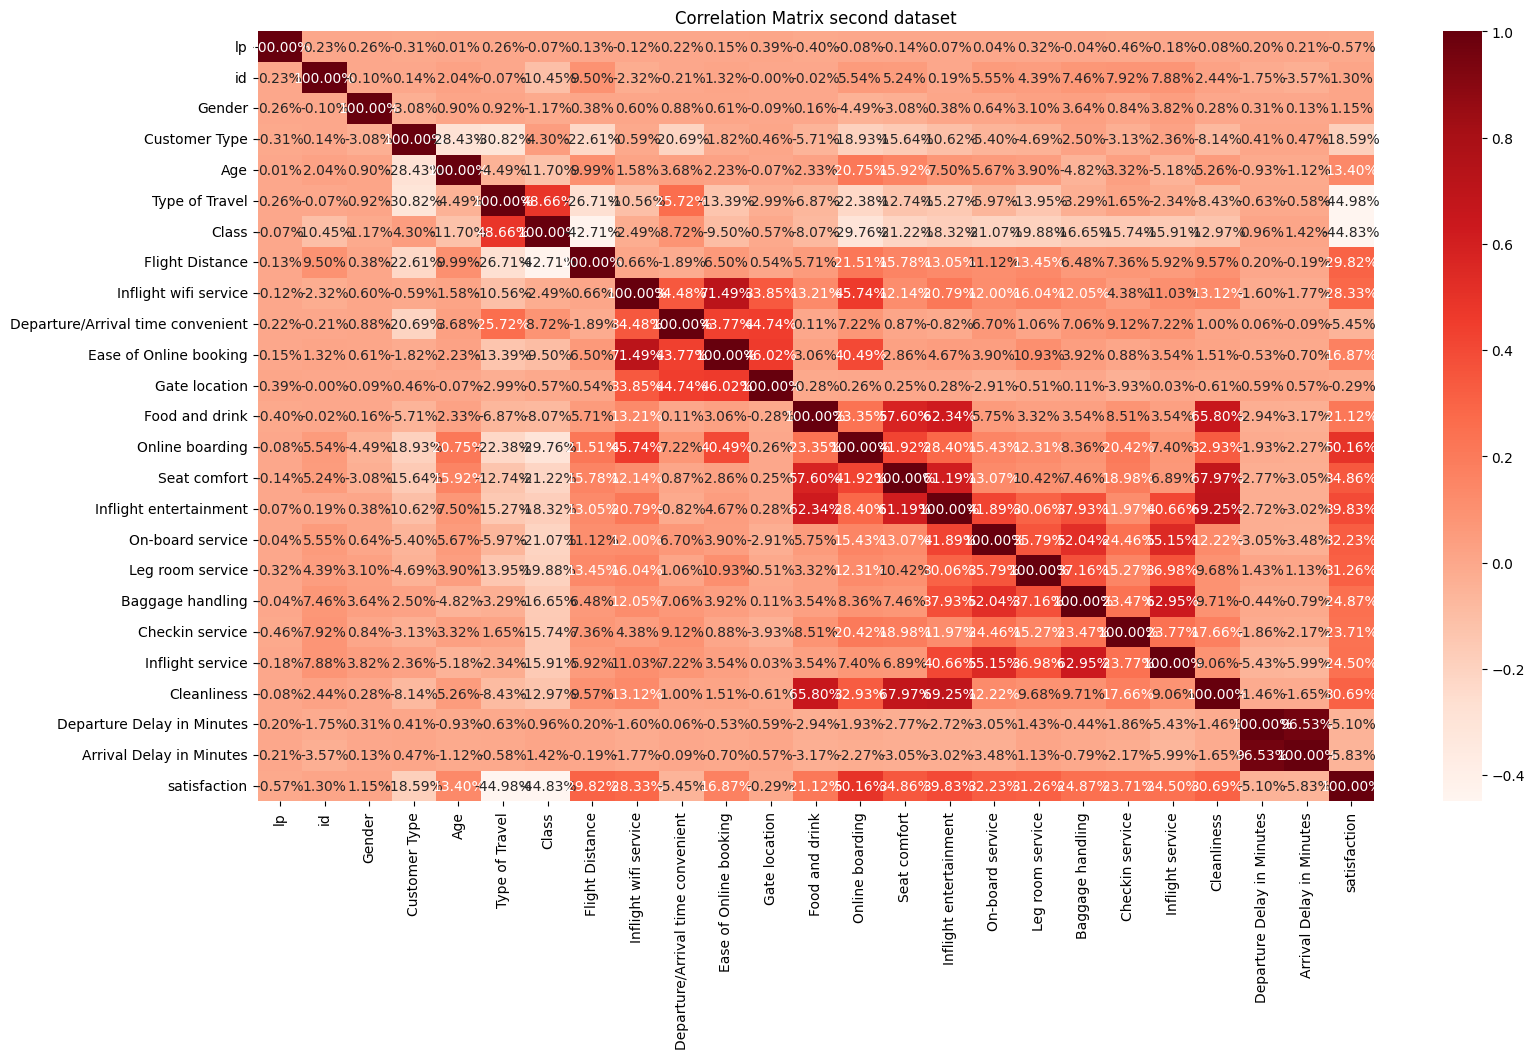

In [ ]:
# Tworzymy wykres z macierzą korelacji
corrmatrix = data.corr()
plt.figure(figsize = (18,10))
heatmap(corrmatrix, cmap = 'Reds', annot = True, fmt = '.2%')
plt.title('Correlation Matrix second dataset')
plt.show()

# Drzewo decyzyjne

In [28]:
# Oddzielamy zmienne wejściowe (x) od zmiennej docelowej (y - satysfakcja)
x = data.drop('satisfaction', axis=1)
y = data.satisfaction

In [29]:
# Dzielimy dane na zbiór treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [31]:
# Tworzymy instancję modelu drzewa decyzyjnego
model = DecisionTreeClassifier()

In [32]:
# Trenujemy model
model = model.fit(x_train, y_train)

In [33]:
# Oceniamy dokładność modelu
model.score(x_train, y_train)

1.0

In [34]:
# Oceniamy dokładność modelu na zbiorze testowym
model.score(x_test, y_test)

0.9474862923777898

In [35]:
# Sprawdzamy parametry modelu
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [37]:
# Zmieniamy minimalną liczbę próbek
model.min_samples_split = 200

# Wyświetlamy zaktualizowane parametry modelu
model.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 200,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [39]:
# Ponawiamy procedurę
model = model.fit(x_train, y_train)

In [40]:
model.score(x_train, y_train)

0.9563467163501916

In [41]:
model.score(x_test, y_test)

0.9533168584446675

In [42]:
# Dokonujemy predykcji na zbiorze testowym
y_test_pred = model.predict(x_test)

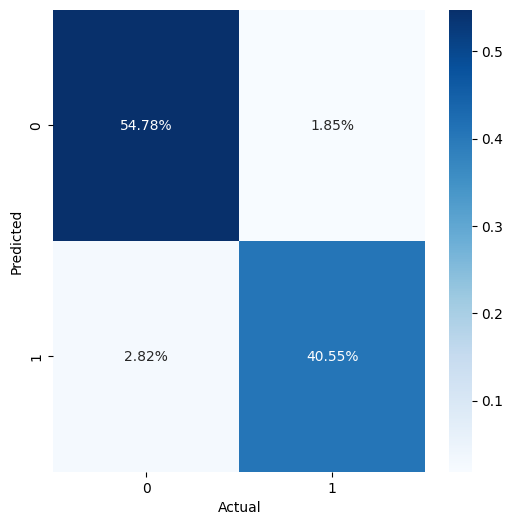

In [44]:
# Obliczamy macierz pomyłek
cm = confusion_matrix(y_test, y_test_pred)

# Tworzymy heatmapę macierzy
plt.figure(figsize = (6, 6))
heatmap(cm / sum(sum(cm)), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Actual')  # Etykieta osi X, oznaczająca rzeczywiste etykiety (prawdziwe klasy)
plt.ylabel('Predicted')  # Etykieta osi Y, oznaczająca przewidywane etykiety (przewidywania modelu)
plt.show()


In [46]:
# Sprawdzamy ważność cech w modelu
model.feature_importances_

array([9.01023575e-04, 1.34164608e-02, 0.00000000e+00, 4.46492710e-02,
       7.20283377e-03, 1.64207923e-01, 2.18089072e-02, 1.75308699e-03,
       1.97942422e-01, 1.61575868e-04, 1.85225512e-03, 1.33225254e-02,
       7.92916270e-04, 4.09381137e-01, 1.10286775e-02, 5.13589736e-02,
       2.86931703e-03, 2.50461839e-03, 1.01020830e-02, 2.61486903e-02,
       9.51107115e-03, 6.60051222e-03, 4.32738755e-04, 2.05098035e-03])

In [48]:
# Tworzymy tabelę z cechami i ich ważnością
importance_table = pd.DataFrame({
    'Variable': x.columns,
    'Importance': model.feature_importances_
})

importance_table = importance_table.sort_values(by='Importance', ascending=False).reset_index(drop=True)
importance_table
# Zdecydowanie wyróżniają się pierwsze trzy cechy - konieczne do zinterpretowania

,Variable,Importance
0,Online boarding,0.409381
1,Inflight wifi service,0.197942
2,Type of Travel,0.164208
3,Inflight entertainment,0.051359
4,Customer Type,0.044649
5,Checkin service,0.026149
6,Class,0.021809
7,id,0.013416
8,Gate location,0.013323
9,Seat comfort,0.011029


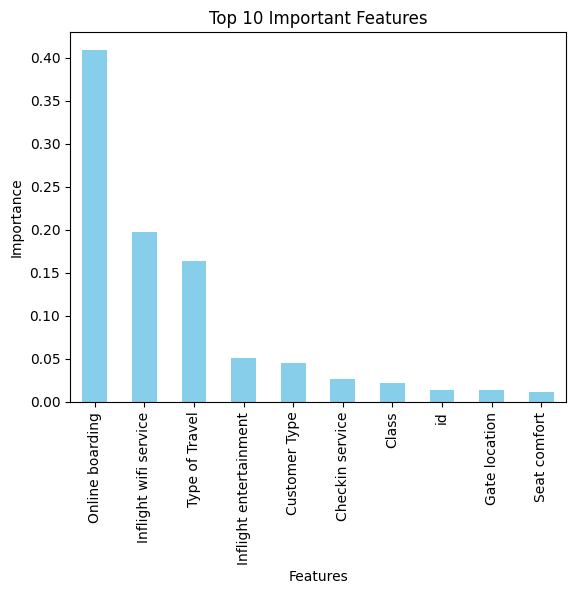

In [50]:
# Rysujemy wykres słupkowy dla najważniejszych cech
importance_table.head(10).plot(kind='bar', x='Variable', y='Importance', legend=False, color='skyblue')
plt.title('Top 10 Important Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [51]:
# Wyświetlamy klasy, które model rozróżnia
model.classes_

array([0, 1])

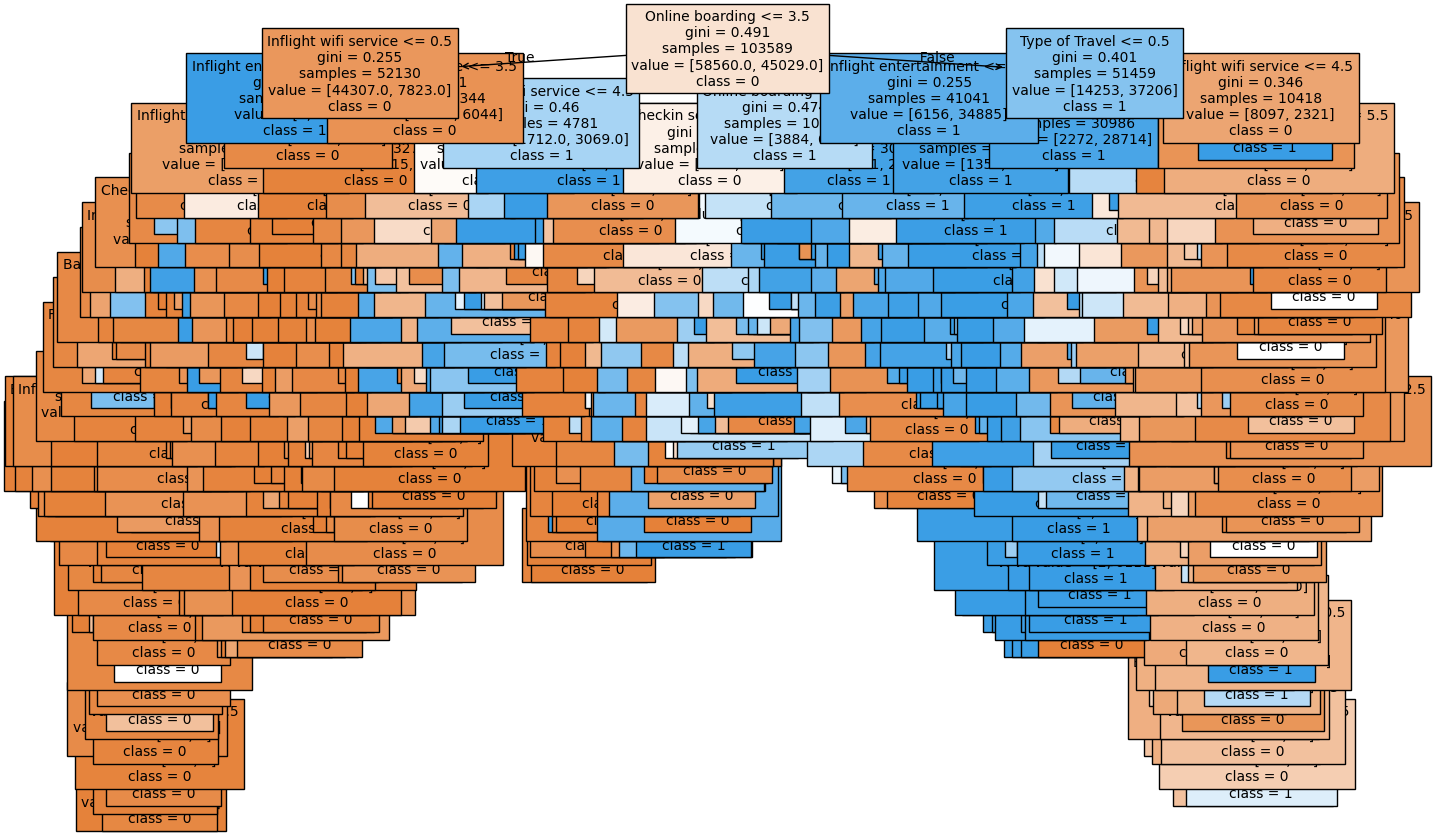

In [52]:
# Tworzymy wykres drzewa decyzyjnego
fig = plt.figure(figsize=(16,10))
plot_tree(model,
          feature_names = x.columns.tolist(),
          class_names = ['0', '1'], #albo odwrotnie bo nie wiem
          filled = True,
          fontsize = 10)
plt.show()

## Minimal cost complexity pruning

In [53]:
model = DecisionTreeClassifier()
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

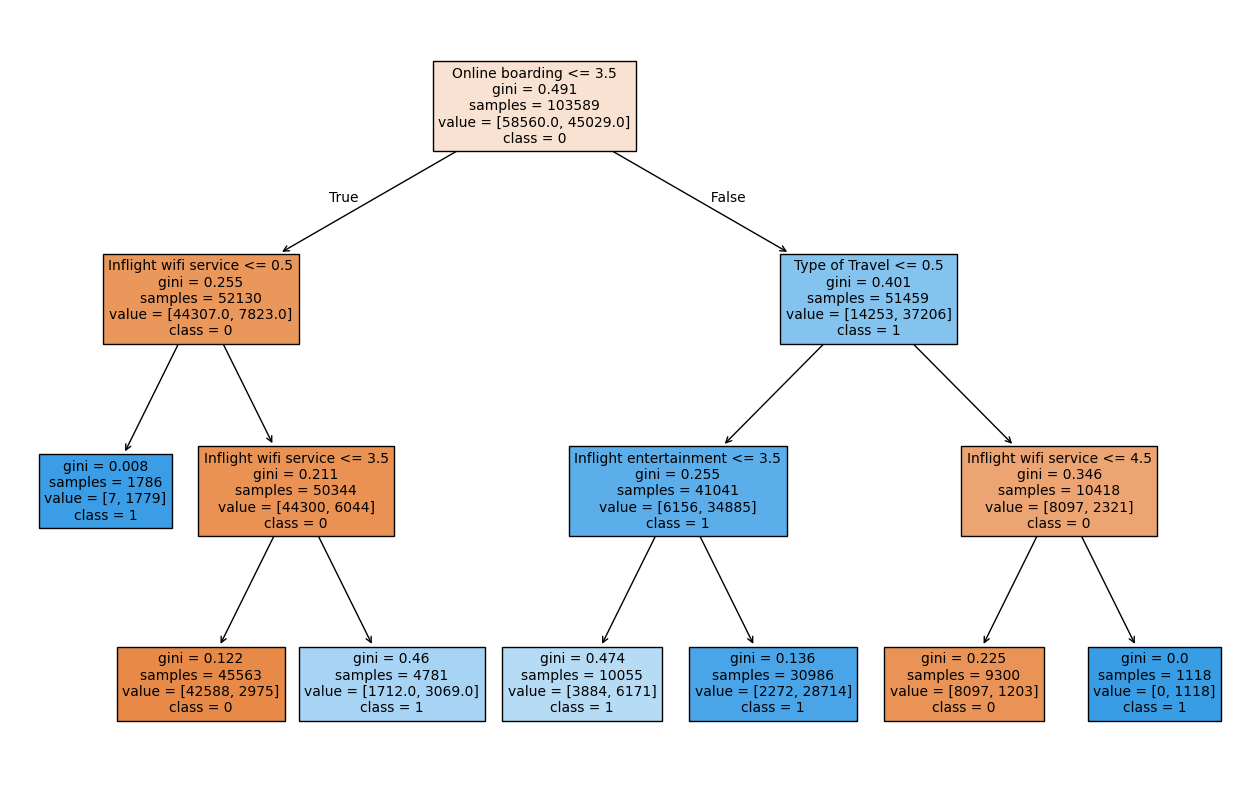

In [54]:
# Utworzenie modelu z parametrem przycinania
model.ccp_alpha = 0.01

model.fit(x_train, y_train)

fig = plt.figure(figsize=(16,10))
plot_tree(model,
          feature_names = x.columns.tolist(),
          class_names = ['0', '1'], #albo odwrotnie bo nie wiem
          filled = True,
          fontsize = 10)
plt.show()

# Algorytm centroidów (K-means clustering)

In [ ]:
df= data.drop('Age', axis=1)

In [ ]:
# Select only numerical columns for clustering
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numerical_columns]


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Find optimal number of clusters using elbow method
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

In [ ]:
# Plot elbow curve
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method for Optimal k')

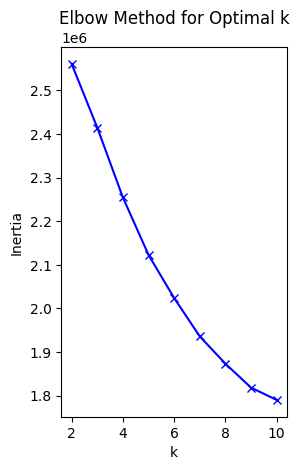

In [ ]:
# Subplot for elbow method
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

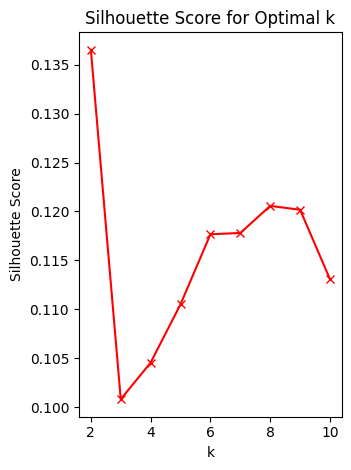

In [ ]:
# Subplot for silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()

In [ ]:
# Apply K-means clustering with optimal k (let's say k=4 based on the plots)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Analyze clusters (only for numerical columns)
cluster_summary = df.groupby('Cluster')[numerical_columns].mean()
print("\nCluster Summary (Numerical Features):")
print(cluster_summary)


Cluster Summary (Numerical Features):
                   id    Gender  Customer Type  Type of Travel     Class  \
Cluster                                                                    
0        63542.869538  0.500654       0.263044        0.347012  0.765705   
1        70077.455751  0.494978       0.045261        0.001787  0.070513   
2        64470.165930  0.500000       0.143066        0.068626  0.298331   
3        63314.132732  0.472990       0.216112        0.710754  1.027073   

         Flight Distance  Inflight wifi service  \
Cluster                                           
0             987.717362               2.315287   
1            1841.472982               1.994799   
2            1446.768048               4.349123   
3             732.242088               2.458263   

         Departure/Arrival time convenient  Ease of Online booking  \
Cluster                                                              
0                                 2.902931               

In [ ]:
# Add frequency analysis for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Features Distribution in Clusters:")
for col in categorical_columns:
    print(f"\n{col} distribution in clusters:")
    print(df.groupby('Cluster')[col].value_counts().unstack())



Categorical Features Distribution in Clusters:


In [ ]:
# isualize clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

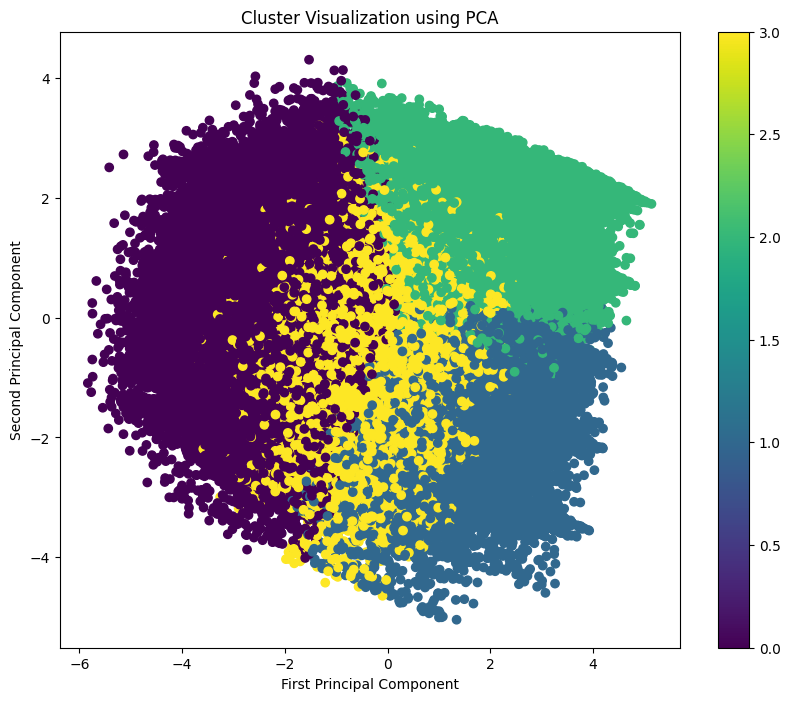

In [ ]:
# plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Cluster Visualization using PCA')
plt.colorbar(scatter)
plt.show()


In [ ]:
feature_importance = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=numerical_columns
)
print("\nCluster Centers (Feature Importance):")
print(feature_importance)



Cluster Centers (Feature Importance):
             id    Gender  Customer Type  Type of Travel     Class  \
0  63538.826493  0.500756       0.263329        0.346585  0.765348   
1  70079.803944  0.495119       0.045711        0.001786  0.070788   
2  64471.653432  0.499964       0.143203        0.068679  0.298631   
3  63312.817213  0.472764       0.215414        0.711747  1.027800   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0       987.718283               2.315155                           2.902642   
1      1840.563685               1.995318                           1.845846   
2      1446.794960               4.348742                           4.078516   
3       732.153419               2.457155                           3.331192   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                2.612080       2.972225  ...                1.974910   
1                1.917308       1.940005  ...                4.

In [ ]:
df.to_csv('clustered_data.csv', index=False)


Results saved to 'clustered_data.csv'
